# Simple molecular systems of two repressing genes

\begin{align}
\dot{X}& = \frac{1}{1+Y^2} -\omega_{X}X \\
\dot{Y}& = \frac{1}{1+X^2} -\omega_{Y}Y
\end{align}

In our model we have two cross repressing genes X and Y . X stops the gene expression of Y and is thereby consumed by binding to the respective promoter region, resulting in a loss of X proportional to the reaction rate $\omega_{X}$. This is described by the term $-\omega_{X}X$.

Y represses X by binding to X, changing its conformity and thereby stopping it from binding to the promoter region of Y. X is hereby conserved. The reaction of Y and X to the inactive form of X is described using the Hill function $\frac{1}{1+Y^2}$. This works the same way vice versa for Y.

# Simulating the model for two starting values




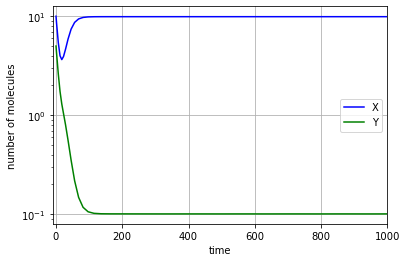

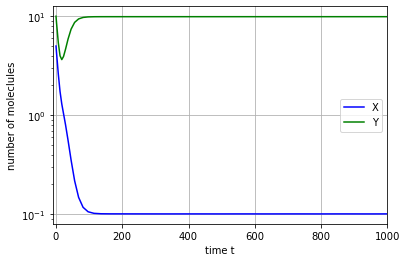

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

class model():
    def __init__(self, parameters, initial_values,t_max):
        #input parameter
        self.omega_x = parameters["omega_x"]
        self.omega_y = parameters["omega_y"]
        self.initial_values= initial_values
        self.t_max = t_max
        #output
        self.X = 0
        self.Y = 0
        self.time = 0
    
    def __ODE(self,t,y):
        return [1/(1+y[1]**2)-self.omega_x*y[0],1/(1+y[0]**2)-self.omega_y*y[1]]
    
    def calc(self):
        solution=solve_ivp(self.__ODE,[0,self.t_max],self.initial_values)
        self.X, self.Y = solution.y
        self.time = solution.t
        
initial_values_b_1 = [10,5]
parameters = {"omega_x" : 0.1, "omega_y" : 0.1}

model_part_b_1 = model(parameters,initial_values_b_1, 1000)
model_part_b_1.calc()

fig_b_1, axarr_b_1 = plt.subplots()
axarr_b_1.plot(model_part_b_1.time,model_part_b_1.X,'-b',label='X')
axarr_b_1.plot(model_part_b_1.time, model_part_b_1.Y,'-g',label='Y')
axarr_b_1.set_ylabel('number of molecules')
axarr_b_1.set_xlabel('time')
axarr_b_1.set_yscale('log')
axarr_b_1.legend()
axarr_b_1.set_xlim([-10,1000])
axarr_b_1.grid(True)


initial_values_b_2= [5,10]

model_part_b_2 = model(parameters,initial_values_b_2, 1000)
model_part_b_2.calc()

fig_b_2, axarr_b_2 = plt.subplots()
axarr_b_2.plot(model_part_b_2.time,model_part_b_2.X,'-b', label='X')
axarr_b_2.plot(model_part_b_2.time, model_part_b_2.Y,'-g',label='Y')
axarr_b_2.set_yscale('log')
axarr_b_2.set_ylabel('number of moleclules')
axarr_b_2.set_xlabel('time t')
axarr_b_2.legend()
axarr_b_2.set_xlim([-10,1000])
axarr_b_2.grid(True)

Here we see our our models simulated for initial values $(5,10)$ and
$(10,5)$ respectively.Starting with our first plot, one sees how the number of gene expression X dominates the system. However Y still exists in the system and does not vanish, a equilibirium point of the system is reached.
We can observe the same dynamic vice versa for our second initial condition, implying bistability in the system.

# Numerically analyzing the stability of the system



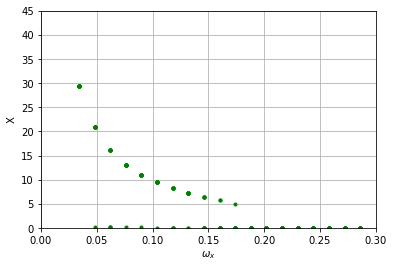

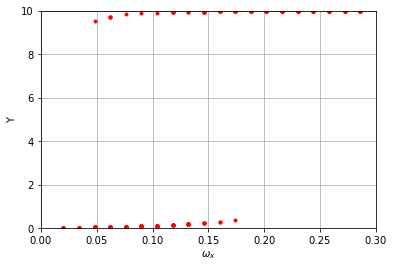

In [4]:
random_parameters = {"omega_x":0.0, "omega_y": 0.1}
resultsX = [] 
resultsY = []
n=20
fig1, axarr1 = plt.subplots()
fig2 ,axarr2 = plt.subplots()
for i in range(n):
    aux_X = 0
    aux_Y = 0
    for j in range(10):
        random_initial_values = [10*np.random.rand(),5*np.random.rand()]
        random_parameters["omega_x"] = 0.02 + (0.28/n)*i
        random_model = model(random_parameters,random_initial_values,1000)
        random_model.calc()
        resultsX.append(random_model.X[len(random_model.time)-1])
        axarr1.plot(random_parameters["omega_x"],random_model.X[len(random_model.time)-1],'g.')
        axarr2.plot(random_parameters["omega_x"],random_model.Y[len(random_model.time)-1],'r.')
axarr1.set_ylabel('X')
axarr1.set_xlabel('$\omega_x$')
axarr1.set_xlim([0.0,0.3])
axarr1.set_ylim([0.0,45])
axarr1.grid(True)
axarr2.set_ylabel('Y')
axarr2.set_xlabel('$\omega_x$')
axarr2.set_ylim([0.0,10])
axarr2.set_xlim([0.0,0.3])
axarr2.grid(True)

Here we see values of $X/Y$ after $t=1000$ with random initial values as a function of $\omega_x$. As we used random initial values, and we see from our graphs above in part b of the exercise, as well as $t=1000$ being roughly the time needed to reach equilibirum, that we can interpret our points as our stable fixed points.
We hereby see that there only exists one stable fixed point, on the interval $\omega_x\in(0.0,0.04)$, two for the interval $\omega_x\in(0.04,0.18)$ and again only one for $\omega_x\in (0.18,\infty)$

# A more analytical approach to find the fixed points of the system using nullclines

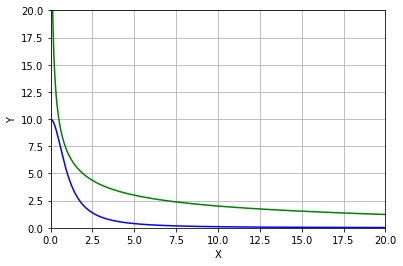

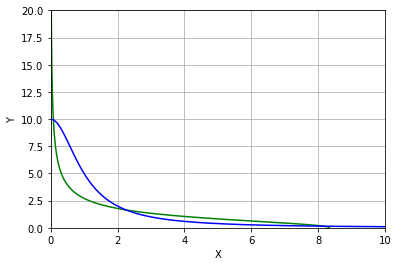

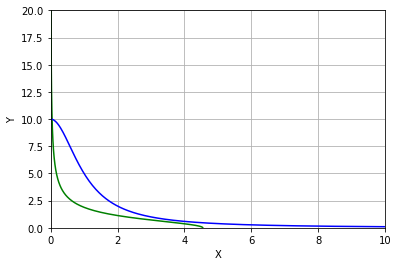

In [5]:
def isoclineX(y,omega_x,c):
    return (1/(1+np.power(y,2))-c)/omega_x
def isoclineY(x,omega_y,c):
    return 1/(omega_y+omega_y*np.power(x,2))-c/omega_y


aux_y =[0.025*i+0.025 for i in range(800)]
aux_x =[0.025*i+0.025 for i in range(800)]
#here we use 0.02 for our first case
nullcline1 = isoclineX(aux_y, 0.02,0)
nullcline2 = isoclineY(aux_x,0.1,0)
fig3, axarr3 = plt.subplots()
axarr3.plot(nullcline1,aux_y,'-g')
axarr3.plot(aux_x,nullcline2,'-b')
axarr3.set_xlim([0,20])
axarr3.set_ylim([0,20])
axarr3.set_xlabel('X')
axarr3.set_ylabel('Y')
axarr3.grid(True)

#here we use 0.1 as for a value in our second regime, same as in part a

nullcline3 = isoclineX(aux_y,0.12,0)
nullcline4 = isoclineY(aux_x,0.1,0)
fig4, axarr4 = plt.subplots()
axarr4.plot(nullcline3,aux_y,'-g')
axarr4.plot(aux_x,nullcline4,'-b')
axarr4.set_xlim([0,10])
axarr4.set_ylim([0,20])
axarr4.set_xlabel('X')
axarr4.set_ylabel('Y')
axarr4.grid(True)

nullcline5 = isoclineX(aux_y,0.22,0)
nullcline6 = isoclineY(aux_x,0.1,0)
fig5,axarr5 = plt.subplots()
axarr5.plot(nullcline5,aux_y,'-g')
axarr5.plot(aux_x,nullcline6,'-b')
axarr5.set_xlim([0,10])
axarr5.set_ylim([0,20])
axarr5.set_xlabel('X')
axarr5.set_ylabel('Y')
axarr5.grid(True)

Here we have plotted our nullclines for $\omega_x \in {0.02,0.12,0.22}$ respectivley. For our first graph we can observe how there exist only one intersection for both nullclines implying this point is stable. 
For the second graph, we get three intersections. Two close to the abscisse/ordinate and one at around$(2.3,2.3)$, which has to be an unstable fixed points using our observations from our previous part. The other two points are therefore our stable fixed points.
For our last fixed points we can observe that there is an intersection of nullclines at roughly $0.1,10$, which is our only stable fixed point, using again our results from the previous part.
At our suspected bifurcation points, we can observe for a starting value of $\omega_x\in(0.04,0.18)$ moving to $\omega_x=0.04/0.18$, how one stable fixed point moves closer to the unstable fixed point until we reach our critical values for $\omega_x$ and they vanish.
This implies a saddle node bifurcation at our critical values.
# Saddle bifurcation
As discussed in part e we expect saddle node bifurcation at our given values, we therefore compute our isoclines for these values and expect the nullclines to touch each other in one point. From our graphs earlier, we are then able to determine whether or not we have saddle node bifurcation.
We hereby pay special attention to our expected interesection of the nullcines at $(1.5,7)$ and vary $\omega_x$ slightly around our critical point.

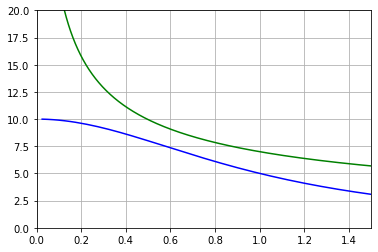

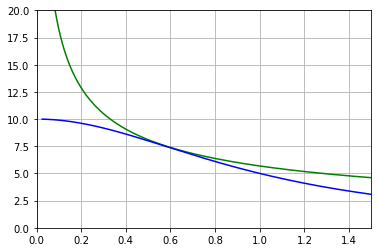

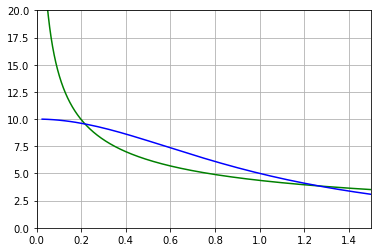

In [6]:
nullcline1 = isoclineX(aux_y, 0.02,0)
nullcline2 = isoclineY(aux_x,0.1,0)
fig3, axarr3 = plt.subplots()
axarr3.plot(nullcline1,aux_y,'-g')
axarr3.plot(aux_x,nullcline2,'-b')
axarr3.set_xlim([0,1.5])
axarr3.set_ylim([0,20])
axarr3.grid(True)

#here we use 0.1 as for a value in our second regime, same as in part a

nullcline3 = isoclineX(aux_y,0.03,0)
nullcline4 = isoclineY(aux_x,0.1,0)
fig4, axarr4 = plt.subplots()
axarr4.plot(nullcline3,aux_y,'-g')
axarr4.plot(aux_x,nullcline4,'-b')
axarr4.set_xlim([0,1.5])
axarr4.set_ylim([0,20])

axarr4.grid(True)

nullcline5 = isoclineX(aux_y,0.05,0)
nullcline6 = isoclineY(aux_x,0.1,0)
fig5,axarr5 = plt.subplots()
axarr5.plot(nullcline5,aux_y,'-g')
axarr5.plot(aux_x,nullcline6,'-b')
axarr5.set_xlim([0,1.5])
axarr5.set_ylim([0,20])
axarr5.grid(True)

As expected, the nullclines starts to intersect at an additional point in the phase space for a $\omega_x\approx 0.03-0.04$. We hereby gain additional fixed points, as intersections of nullclines are therefore points, where both $\dot X$ and $\dot Y$ are zero. This is our definition of a fixed point.
